<a href="https://colab.research.google.com/github/Baisalis/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
from scipy import stats
import numpy as np

coinflips = np.random.binomial(n=10, p=0.5, size=100)

In [0]:
def confidence_interval(data, alpha=.9):
  n = len(data)
  mean = sum(data)/n
  data = np.array(data)
  stderr = stats.sem(data)
  t = stats.t.ppf((1 + alpha) / 2.0, n-1)
  interval = stderr * t
  return (mean , mean-interval, mean+interval)

In [9]:
confidence_interval(coinflips, alpha=0.9)

(5.03, 4.779736682699517, 5.280263317300483)

In [10]:
stats.bayes_mvs(coinflips)

(Mean(statistic=5.03, minmax=(4.779736682699517, 5.280263317300483)),
 Variance(statistic=2.318659793814433, minmax=(1.8251945287444566, 2.9191526002523327)),
 Std_dev(statistic=1.5187952135462524, minmax=(1.3509976050106294, 1.708552779475171)))

In [11]:
coinflips = np.random.binomial(n=10, p=0.5, size=5)
confidence_interval(coinflips)

(4.6, 3.1541111655513783, 6.045888834448621)

In [12]:
stats.bayes_mvs(coinflips)

(Mean(statistic=4.6, minmax=(3.1541111655513774, 6.045888834448621)),
 Variance(statistic=4.6, minmax=(0.9696735609052793, 12.944564511097786)),
 Std_dev(statistic=1.900744999106472, minmax=(0.9847200418927602, 3.5978555433893935)))

In [13]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
  return (prob_positive_drunk * prob_drunk_prior) / prob_positive
prob_drunk_given_positive(0.001, 0.08, 1)

0.0125

In [14]:
import scipy
from scipy import stats
help(scipy.stats.bayes_mvs)

Help on function bayes_mvs in module scipy.stats.morestats:

bayes_mvs(data, alpha=0.9)
    Bayesian confidence intervals for the mean, var, and std.
    
    Parameters
    ----------
    data : array_like
        Input data, if multi-dimensional it is flattened to 1-D by `bayes_mvs`.
        Requires 2 or more data points.
    alpha : float, optional
        Probability that the returned confidence interval contains
        the true parameter.
    
    Returns
    -------
    mean_cntr, var_cntr, std_cntr : tuple
        The three results are for the mean, variance and standard deviation,
        respectively.  Each result is a tuple of the form::
    
            (center, (lower, upper))
    
        with `center` the mean of the conditional pdf of the value given the
        data, and `(lower, upper)` a confidence interval, centered on the
        median, containing the estimate to a probability ``alpha``.
    
    See Also
    --------
    mvsdist
    
    Notes
    -----
    Each

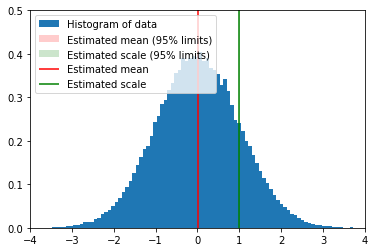

In [21]:
    from scipy import stats
    data = [6, 9, 12, 7, 8, 8, 13]
    mean, var, std = stats.bayes_mvs(data)


    n_samples = 100000
    data = stats.norm.rvs(size=n_samples)
    res_mean, res_var, res_std = stats.bayes_mvs(data, alpha=0.95)
    
    import matplotlib.pyplot as plt
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(data, bins=100, density=True, label='Histogram of data')
    ax.vlines(res_mean.statistic, 0, 0.5, colors='r', label='Estimated mean')
    ax.axvspan(res_mean.minmax[0],res_mean.minmax[1], facecolor='r',
              alpha=0.2, label=r'Estimated mean (95% limits)')
    ax.vlines(res_std.statistic, 0, 0.5, colors='g', label='Estimated scale')
    ax.axvspan(res_std.minmax[0],res_std.minmax[1], facecolor='g', alpha=0.2,
                label=r'Estimated scale (95% limits)')
    
    ax.legend(fontsize=10)
    ax.set_xlim([-4, 4])
    ax.set_ylim([0, 0.5])
    plt.show()

In [0]:
import pandas as pd
import numpy as np

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'
names = ['party', 'handicapped-infants', 'water-project', 'budget',
         'physician-fee-freeze', 'el-salvador-aid', 'religious_groups_in_schools',
         'anti-satellite-test-ban', 'aid-to-contras', 'mx-missle', 'immigration',
         'synfuels-corp-cutback','education-spending','superfund-right-to-sue',
         'crime', 'duty-free-exports', 'export-SAfrica']
df = pd.read_csv(url, header=None, names=names)
df = df.replace({'?':np.nan, 'n':0, 'y':1, 'democrat':1, 'republican':0})

In [0]:
budget = df[['party', 'budget']].dropna()
budget = budget.set_index(budget.party)
budget = budget['budget']

In [29]:
budget.count()
budget.shape

(424,)

In [40]:
ttestconfidence = confidence_interval(budget, confidence=0.99)
print(ttestconfidence)
ttestconfidence[0]

TypeError: ignored

In [32]:
bayesmean, bayesvar, bayesstd = scipy.stats.bayes_mvs(budget)
bayesmean

Mean(statistic=0.5966981132075472, minmax=(0.5573791816376577, 0.6360170447774367))

NameError: ignored

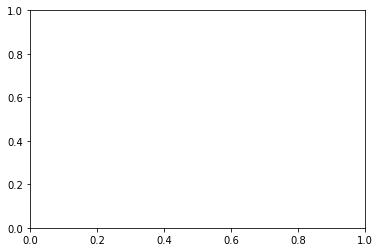

In [33]:
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(111)
sns.distplot(ttestconfidence, hist=False, rug=True);
ax.vlines(bayesmean.statistic, 0, 5, colors='r', label='Bayesian mean')
ax.axvspan(bayesmean.minmax[0],bayesmean.minmax[1], facecolor='r',
            alpha=0.2, label='Bayesian mean confidence')
ax.vlines(ttestconfidence[0], 0, 5, colors='b', label='Frequentist mean')
ax.axvspan(ttestconfidence[1],ttestconfidence[2], facecolor='b',
            alpha=0.2, label='Frequentist mean confidence')
ax.text(0.40, 6.1, 'A comparison of frequentist and Bayesian confidence on mean', fontsize=15, fontweight='bold')
ax.text(0.40, 5.8, 'Normalized affirming vote by party on budget', fontsize=12, fontweight='bold')
ax.legend(loc='upper left');

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)